**CodeClause**

AUTHOR : ARYAN NAGNATH SALGE

PROJECT 2: Market Basket Analysis in Python using Apriori Algorithm

In [3]:
!pip install apyori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=d9d0565aaccbf53bf82fa6275e0e85775b96e9c94db6a6c4adc5204bffb8afc5
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [7]:
df = pd.read_csv("/content/Market_Basket_Optimisation.csv", header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df.shape)

(7501, 20)


In [9]:
records = []
for i in range(1, 7501):
    records.append([str(df.values[i, j]) for j in range(0, 20)])
     

In [10]:
print(type(records))


<class 'list'>


In [11]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [13]:
print("There are {} Relations derived.".format(len(association_results)))


There are 48 Relation derived.


In [14]:
for i in range(0, len(association_results)):
    print(association_results[i][0])


frozenset({'light cream', 'chicken'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'ground beef', 'tomato sauce'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'pasta', 'shrimp'})
frozenset({'light cream', 'nan', 'chicken'})
frozenset({'frozen vegetables', 'chocolate', 'shrimp'})
frozenset({'ground beef', 'spaghetti', 'cooking oil'})
frozenset({'nan', 'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'nan', 'escalope'})
frozenset({'frozen vegetables', 'spaghetti', 'ground beef'})
frozenset({'olive oil', 'frozen vegetables', 'milk'})
frozenset({'mineral water', 'frozen vegetables', 'shrimp'})
frozenset({'olive oil', 'frozen vegetables', 'spaghetti'})
frozenset({'frozen vegetables', 'spaghetti', 'shrimp'})
frozenset({'frozen vegetables', 'spaghetti', 'tomatoes'})
frozenset({'spaghetti', 'ground beef', 'grated cheese'})
frozenset({'mineral water', 'herb & pepper', 'ground beef'})


In [15]:
for item in association_results:
   
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")
     

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: ground beef -> tomato sauce
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: light cream -> nan
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: frozen vegetables -> chocolate
Support: 0.005333333333333333
Confidence: 0.23255813953488372
L

In [16]:
import networkx as nx
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)
     

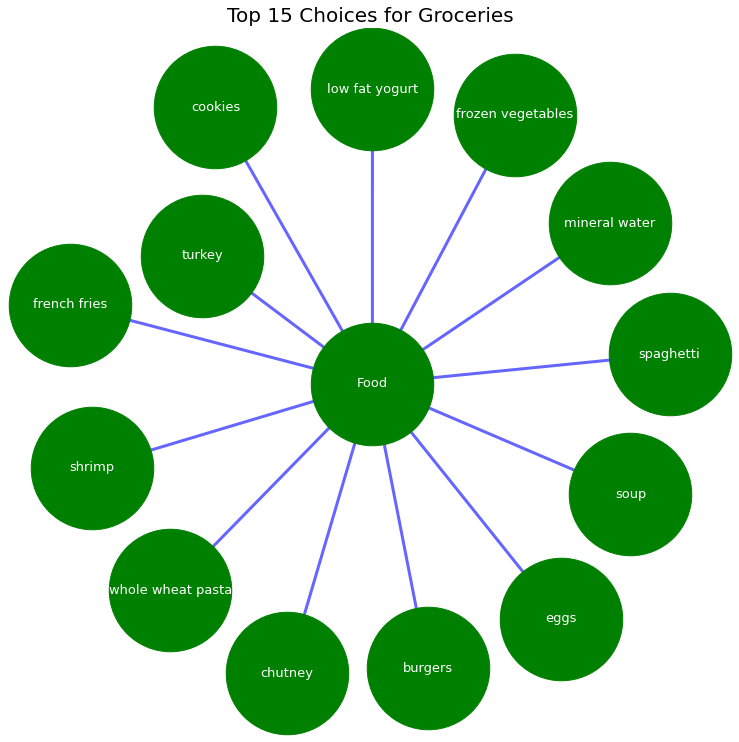

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = 'GREEN')
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'BLUE')
nx.draw_networkx_labels(food, pos, font_size = 13, font_family = 'Times New Roman', font_color='WHITE')
plt.axis('off')
plt.grid()
plt.title('Top 15 Choices for Groceries', fontsize = 20)
plt.show()